# Music Genre Classification using Keras

### Import Libraries

In [1]:
# Common libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras.utils import to_categorical, np_utils

### Prepare Data

In [2]:
# Clean up and rename labels column
df = pd.read_csv('data.csv')
df = df.drop(["label","filename"],axis=1)
df = df.rename({'mfcc20': 'label'}, axis=1)
print(df.shape)
df.head()

(1000, 26)


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158827,42.351028,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006722,8.930560,35.874687,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754759,-13.649587,11.629271,-11.780589,9.706442,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754461,14.238345,-4.830883,9.297966,-0.757742,8.149012,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,-32.489265,10.864513,-23.357929,0.503118,-11.805833,1.206805,-13.083821,-2.806383,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [3]:
# Separate features and albels
X = df.drop(["label"],axis=1).values
y = df["label"].values

# Standardize features (mean 0, stddev 1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Encode class values as integers and one-hot encode
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_y)

# Train/test split if we need it
X_train, X_test, y_train, y_test = train_test_split(X_standardized, dummy_y, test_size=0.20, random_state=40)
print(X_train.shape)
print(X_test.shape)

(800, 25)
(200, 25)


In [4]:
# See what the feature list looks like 
X[0]

array([ 3.49943221e-01,  1.78442045e+03,  2.00265019e+03,  3.80648532e+03,
        8.30663910e-02, -1.13596748e+02,  1.21557297e+02, -1.91588268e+01,
        4.23510284e+01, -6.37645817e+00,  1.86188755e+01, -1.36979122e+01,
        1.53446312e+01, -1.22852669e+01,  1.09804916e+01, -8.32432461e+00,
        8.81066894e+00, -3.66736817e+00,  5.75169086e+00, -5.16276264e+00,
        7.50947773e-01, -1.69193780e+00, -4.09952581e-01, -2.30020881e+00,
        1.21992850e+00])

### Helper Functions

In [5]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

### Define Model

In [6]:
# Basic model
def model():
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim=25, activation='relu'))
	model.add(Dense(64, input_dim=32, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [7]:
# Sophisticated model
def model2():
	# create model
  model = Sequential()
  model.add(Dense(128, input_dim=25, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, input_dim=128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, input_dim=64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
 
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [8]:
# Extra fancy model 
def model3():
	# create model
  model = Sequential()
  model.add(Dense(128, input_dim=25, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(64, input_dim=128, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(32, input_dim=64, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(10, activation='softmax'))
 
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

### Train Model 

Training Accuracy: 0.9638
Testing Accuracy:  0.6300


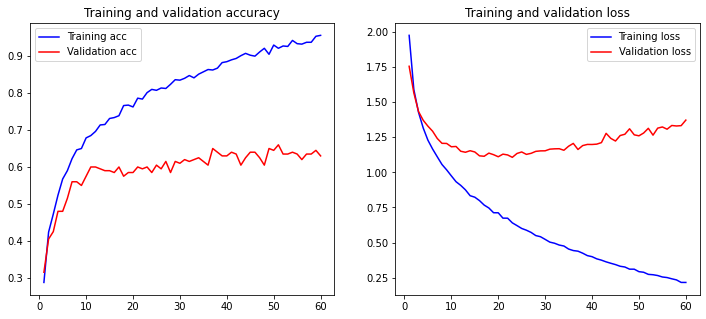

In [9]:
# Basic Model
target_model = model()

history = target_model.fit(X_train, y_train,
                    epochs=60,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = target_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = target_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Training Accuracy: 0.9862
Testing Accuracy:  0.6400


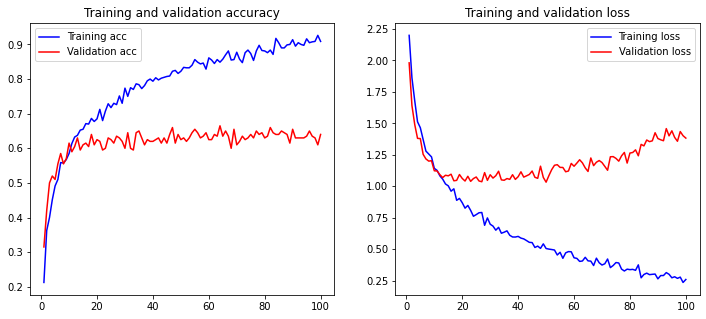

In [10]:
# Sophisticated Model
target_model = model2()

history = target_model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = target_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = target_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Training Accuracy: 0.9937
Testing Accuracy:  0.6600


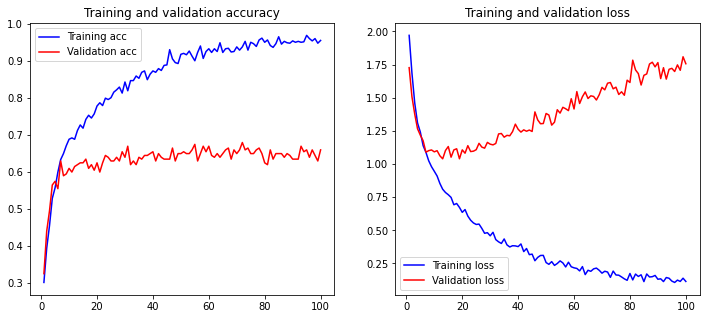

In [11]:
# Super fancy Model
target_model = model3()

history = target_model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = target_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = target_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Evaluate using KFold cross-validation

In [12]:
# Basic Model
estimator = KerasClassifier(build_fn=model, epochs=30, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_standardized, dummy_y, cv=kfold)
print("Model 1 Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model 1 Baseline: 63.80% (2.69%)


In [13]:
# Sophisticated Model
estimator2 = KerasClassifier(build_fn=model2, epochs=60, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator2, X_standardized, dummy_y, cv=kfold)
print("Model 2 Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model 2 Baseline: 64.90% (1.46%)


In [14]:
# Super fancy Model
estimator3 = KerasClassifier(build_fn=model3, epochs=60, batch_size=5, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator3, X_standardized, dummy_y, cv=kfold)
print("Model 3 Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model 3 Baseline: 65.80% (3.33%)


### Export Model

In [ ]:
target_model.save('Model2.h5')